# Deconvelution

lets see what we get

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("~/Metabric/Data.csv")

In [6]:
data=pd.DataFrame(data.drop(['Tumor.Stage',  'PAM50CL', 'Nottingham.prog.ind'], axis=1)) 
data=data.dropna(axis=0)

(1764, 40)

In [7]:
# Mapping dictionaries
mappings = {
    'HER2': {'Positive': 1, 'Negative': 0},
    'PgR': {'Positive': 1, 'Negative': 0},
    'ER': {'Positive': 1, 'Negative': 0},
    'Cellularity': {'Low': 1, 'Moderate': 2, 'High': 3}
}

# Replace values in columns using the mappings
for column, mapping in mappings.items():
    data[column] = data[column].replace(mapping)

# Convert categorical column 'PAM50' to dummy variables
data = pd.get_dummies(data, columns=['PAM50'])

In [8]:
data.shape

(1764, 44)

In [9]:
data.head()

,Mixture,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,...,Lym.nodes.positive,RFSurvival,RFStatus,Age,Cellularity,PAM50_Basal,PAM50_Her2,PAM50_LumA,PAM50_LumB,PAM50_Normal
0,MB.0362,0.0,0.001666,0.001131,0.210700,0.0,0.016915,0.000926,0.005229,0.006589,...,1.0,46.41,1.0,52.79,3,False,False,False,True,False
1,MB.0346,0.0,0.003289,0.000000,0.051879,0.0,0.000000,0.000000,0.003398,0.024772,...,5.0,20.16,1.0,32.61,3,False,True,False,False,False
2,MB.0386,0.0,0.009385,0.047657,0.190845,0.0,0.001727,0.000000,0.005864,0.048940,...,8.0,121.09,1.0,66.83,2,False,False,False,True,False
3,MB.0574,0.0,0.002752,0.000086,0.176506,0.0,0.000252,0.000000,0.001514,0.014069,...,1.0,9.84,1.0,71.21,3,False,False,False,True,False
5,MB.0503,0.0,0.004117,0.038353,0.156123,0.0,0.009309,0.005259,0.003304,0.008675,...,0.0,99.90,0.0,60.77,3,False,False,True,False,False


# Preprocessing 

In [10]:
import seaborn as sns
from sklearn import set_config
from sklearn.model_selection import ShuffleSplit, GridSearchCV

 
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM

In [11]:
set_config(display="text")  # displays text representation of estimators
sns.set_style("whitegrid")

In [12]:
X= pd.DataFrame(data.drop(['Mixture','RFSurvival','RFStatus'], axis=1))  
d3= pd.DataFrame(data.drop(['Mixture','RFSurvival','RFStatus'], axis=1))  
y=  data[['RFStatus','RFSurvival']]

In [13]:
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.StandardScaler().fit(X).transform(X), columns =d3.columns)
X.shape
X.head()

,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,GenMod1,...,PgR,Tumor.Size,Lym.nodes.positive,Age,Cellularity,PAM50_Basal,PAM50_Her2,PAM50_LumA,PAM50_LumB,PAM50_Normal
0,-0.240249,-0.516887,-0.409623,0.606237,-0.279513,1.078028,-0.511583,0.417053,-0.855290,0.201101,...,0.953463,-0.548884,-0.252540,-0.630026,0.874699,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
1,-0.240249,-0.326461,-0.443483,-0.989886,-0.279513,-0.567284,-0.622712,0.051459,0.312454,-0.103742,...,-1.048809,-0.678931,0.711704,-2.178924,0.874699,-0.461741,2.495898,-0.715240,-0.599178,-0.301511
2,-0.240249,0.388537,0.983750,0.406695,-0.279513,-0.399258,-0.622712,0.544000,1.864571,0.881041,...,0.953463,-0.743955,1.434887,0.447601,-0.606078,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
3,-0.240249,-0.389463,-0.440916,0.262595,-0.279513,-0.542771,-0.622712,-0.324862,-0.374897,-0.980525,...,0.953463,-0.353813,-0.252540,0.783784,0.874699,-0.461741,-0.400657,-0.715240,1.668954,-0.301511
4,-0.240249,-0.229412,0.705109,0.057752,-0.279513,0.338184,0.008489,0.032664,-0.721298,0.721458,...,0.953463,-0.223766,-0.493601,-0.017529,0.874699,-0.461741,-0.400657,1.398132,-0.599178,-0.301511


In [14]:
X.shape
y.shape

(1764, 2)

In [15]:
y.head()

,RFStatus,RFSurvival
0,1.0,46.41
1,1.0,20.16
2,1.0,121.09
3,1.0,9.84
5,0.0,99.90


In [16]:
n_censored = y.shape[0] - y["RFStatus"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

59.2% of records are censored


In [17]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['RFStatus'], y['RFSurvival'], prediction)
    return result[0]

In [18]:
y=y.to_numpy()
aux = [(e1,e2) for e1,e2 in y]
ny = np.array(aux, dtype=[('RFStatus', '?'), ('RFSurvival', '<f8')])

In [28]:
estimator = FastSurvivalSVM(random_state=0)
param_grid={'alpha':2.2**np.arange(-20,0,1),'max_iter':np.arange(0,6,1),'tol':2.2**np.arange(-10,0,1)}
cv = ShuffleSplit(n_splits=4, test_size=0.33, random_state=0)
gcv = GridSearchCV(estimator, param_grid, scoring=score_survival_model, error_score='raise',
                   n_jobs=1, refit=False,
                   cv=cv)

In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
gcv = gcv.fit(X, ny)

In [30]:
round(gcv.best_score_,3),gcv.best_params_

(0.683,
 {'alpha': 7.77907269800675e-05, 'max_iter': 2, 'tol': 0.0003765071185835268})

In [31]:
estimator.set_params(**gcv.best_params_)
estimator.fit(X, ny)
estimator.score(X, ny)

0.6874960948372328

# SHAP

In [32]:
###!pip install shap
import shap

c:\Users\Youness\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
svm_explainer = shap.KernelExplainer(estimator.predict, X,feature_names=d3.columns)   # 
svm_shap_values = svm_explainer.shap_values(X)

Using 1764 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1764 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  0%|          | 1/1764 [00:50<24:52:55, 50.81s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), 

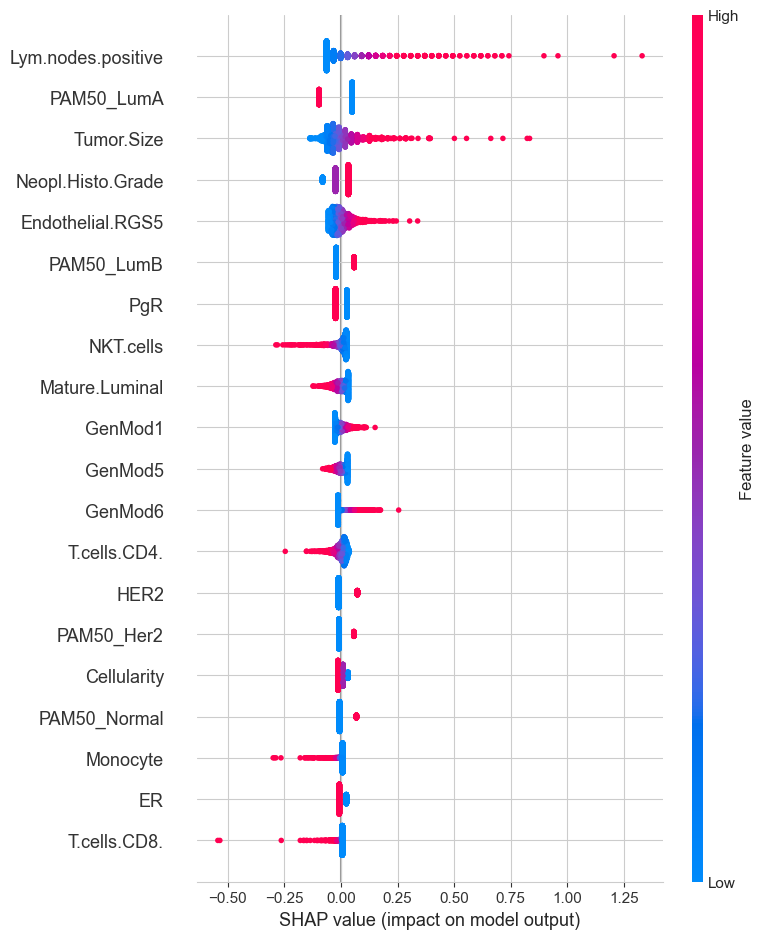

In [35]:
svm_shap= pd.DataFrame(svm_shap_values,columns=X.columns)
svm_shap.to_csv('~/Metabric/SHAP SSVM.csv') 

shap.summary_plot(svm_shap_values, X,feature_names=X.columns)

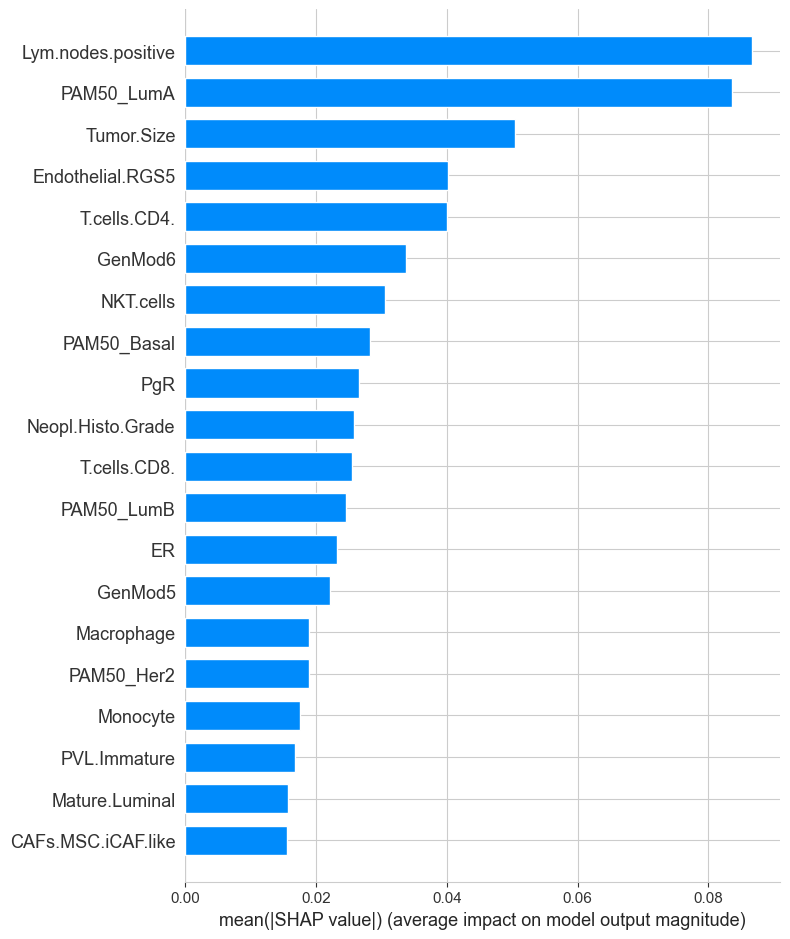

In [25]:
shap.summary_plot(svm_shap_values, X , feature_names=d3.columns, plot_type="bar")